In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import statsmodels.api as sm

In [4]:
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('h1b_data.csv')
df.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,...,pw_level,wage_from,wage_to,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,lat,lng
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,USA,NEPHROLOGIST,...,NaN,190000.00,0.0,Y,ABBEVILLE,SC,N,N,34.178172,-82.379015
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,USA,POST DOCTORAL FELLOW,...,Level I,47507.00,0.0,Y,ABERDEEN,ID,N,N,42.944078,-112.838326
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,USA,OPERATION ANALYST,...,Level I,65000.00,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,USA,SR. INDUSTRIAL ENGINEER,...,Level II,86988.15,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,NaN,HEMATOLOGIST/ONCOLOGIST,...,NaN,450000.00,0.0,Y,ABERDEEN,SD,N,N,45.464698,-98.486483


In [6]:
df.shape

(3360810, 25)

### Since the dataset is quite massive, it is a good idea to work on a sample. The latest data we have is from the year 2017, so we will choose that.

In [7]:
df17 = df[df['case_year'] == 2017]

In [8]:
df17.shape

(579397, 25)

### Since all the data in our sample dataset is from 2017, we can remove the case year column.

In [9]:
df17 = df17.drop('case_year', axis = 1)

In [10]:
df17.isnull().sum()/len(df17)*100

case_status              0.000000
case_submitted           0.000000
decision_date            0.000000
emp_name                 0.008630
emp_city                 0.002071
emp_state                0.002934
emp_zip                  0.002416
emp_country             15.271222
job_title                0.000518
soc_code                 0.000000
soc_name                 0.000173
full_time_position       0.000345
prevailing_wage          0.000173
pw_unit                  0.004833
pw_level                19.596408
wage_from                0.000000
wage_to                  0.000000
wage_unit                0.000690
work_city                0.000000
work_state               0.000000
emp_h1b_dependent        0.000345
emp_willful_violator     0.000345
lat                      0.000000
lng                      0.000000
dtype: float64

### Since emp_country and pw_level have the most number of missing values, we will deal with them first.

In [11]:
df17['emp_country'].value_counts()

USA          490905
CANADA            7
AUSTRALIA         2
CAMBODIA          1
CHINA             1
Name: emp_country, dtype: int64

### From the output of the value_counts function, we can see that the emp_country column has a mode of USA. Since we have no other information about the missing values in the emp_country column, we can impute the mode of the column.

In [12]:
df17['emp_country'] = df17['emp_country'].fillna('USA', axis = 0)

In [13]:
df17['emp_country'].isnull().sum()

0

In [14]:
df17['pw_level'].value_counts()

Level I      206508
Level II     167807
Level III     58403
Level IV      33138
Name: pw_level, dtype: int64

### Since both Level I and Level II occur frequently, we are using bfill to fill null values.

In [15]:
df17['pw_level'].fillna(method = 'bfill', inplace = True)

In [16]:
df17['pw_level'].replace(np.nan, 'Level I', inplace = True)

In [17]:
df17['pw_level'].isnull().sum()

0

In [18]:
df17.isnull().sum()

case_status              0
case_submitted           0
decision_date            0
emp_name                50
emp_city                12
emp_state               17
emp_zip                 14
emp_country              0
job_title                3
soc_code                 0
soc_name                 1
full_time_position       2
prevailing_wage          1
pw_unit                 28
pw_level                 0
wage_from                0
wage_to                  0
wage_unit                4
work_city                0
work_state               0
emp_h1b_dependent        2
emp_willful_violator     2
lat                      0
lng                      0
dtype: int64

In [19]:
df17['emp_state'].value_counts()

CA    97300
TX    83660
NJ    69884
IL    39083
NY    36916
MI    25719
PA    24082
MA    21954
MD    20162
WA    19806
VA    18082
FL    18007
NC    17595
GA    16081
OH     9022
CT     5591
TN     4491
MN     4391
MO     4346
AZ     3876
CO     3723
WI     3456
IN     2700
KY     2358
DE     2272
AR     2148
IA     1986
DC     1875
UT     1821
KS     1807
NE     1706
OR     1565
SC     1448
LA     1207
AL     1126
NH      979
OK      940
RI      930
NV      853
ID      600
NM      593
PR      549
ME      435
MS      412
VT      385
WV      367
ND      301
HI      280
SD      217
MT      111
WY       88
AK       74
VI       19
AS        1
Name: emp_state, dtype: int64

In [20]:
df17['emp_city'].value_counts()

PLANO        32620
NEW YORK     27014
CHICAGO      24079
ROCKVILLE    13824
EDISON       11754
             ...  
DURAND           1
OWOSSO           1
MONACA           1
DUNMORE          1
PONDER           1
Name: emp_city, Length: 4603, dtype: int64

In [21]:
df17['emp_state'].replace(np.nan, 'CA', inplace = True)

In [22]:
df17['emp_city'].replace(np.nan, 'PLANO', inplace = True)

In [23]:
df17['emp_zip'].value_counts()

75024         22282
20850         13619
27709         10896
60606         10332
19103          9900
              ...  
19801-5363        1
32174             1
92368             1
83544             1
33541             1
Name: emp_zip, Length: 10328, dtype: int64

In [24]:
df17['emp_zip'].replace(np.nan, '159573', inplace = True)

In [25]:
df17['job_title'].value_counts()

PROGRAMMER ANALYST                                   44275
SOFTWARE ENGINEER                                    26587
SOFTWARE DEVELOPER                                   15188
SYSTEMS ANALYST                                      10131
BUSINESS ANALYST                                      6905
                                                     ...  
ATG SOFTWARE DEVELOPER                                   1
SENIOR WEBSPHERE ENGINEER                                1
UNIFIED COMMUNICATIONS TECHNICAL SUPPORT ENGINEER        1
COMPUTER SYSTEM ANALYST. SENIOR.NET                      1
LEAD DEVELOPER, STERLING OMS                             1
Name: job_title, Length: 85633, dtype: int64

In [26]:
df17['job_title'].replace(np.nan, 'PROGRAMMER ANALYST', inplace = True)

In [27]:
df17['soc_name'].value_counts()

SOFTWARE DEVELOPERS, APPLICATIONS                    118071
COMPUTER SYSTEMS ANALYSTS                             88486
COMPUTER PROGRAMMERS                                  62335
COMPUTER OCCUPATIONS, ALL OTHER                       49762
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                 17573
                                                      ...  
BIOINFORMATICS TECHNICIANS                                1
SOFTWARE QUALITY ANALYSTS, ENGINEERS AND TESTERS          1
AGRICULTURAL INSPECTORS                                   1
MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGITS                 1
ENGINEERING TECHNICIANS, EXCEPT DRAFTERS, ALL OTH         1
Name: soc_name, Length: 824, dtype: int64

In [28]:
df17['soc_name'].replace(np.nan, 'COMPUTER SYSTEMS ANALYSTS', inplace = True)

In [29]:
df17['full_time_position'].value_counts()

Y    567381
N     12014
Name: full_time_position, dtype: int64

In [30]:
df17['full_time_position'].replace(np.nan, 'Y', inplace = True)

In [31]:
df17['prevailing_wage'].median()

70221.0

In [32]:
df17['prevailing_wage'].replace(np.nan, df['prevailing_wage'].median(), inplace = True)

In [33]:
df17['pw_unit'].value_counts()

Y     544764
H      34183
M        268
W        110
BW        44
Name: pw_unit, dtype: int64

In [34]:
df17['pw_unit'].replace(np.nan, 'Y', inplace = True)

In [35]:
df17['wage_unit'].value_counts()

Y     544804
H      33976
M        372
W        144
BW        97
Name: wage_unit, dtype: int64

In [36]:
df17['wage_unit'].replace(np.nan, 'Y', inplace = True)

In [37]:
df17['emp_h1b_dependent'].value_counts()

N    358350
Y    221045
Name: emp_h1b_dependent, dtype: int64

In [38]:
df17['emp_h1b_dependent'].replace(np.nan, 'N', inplace = True)

In [39]:
df17['emp_willful_violator'].value_counts()

N    578970
Y       425
Name: emp_willful_violator, dtype: int64

In [40]:
df17['emp_willful_violator'].replace(np.nan, 'N', inplace = True)

In [41]:
df17['emp_name'].value_counts()

INFOSYS LIMITED                                   20146
TATA CONSULTANCY SERVICES LIMITED                 12897
CAPGEMINI AMERICA INC                              8982
IBM INDIA PRIVATE LIMITED                          8390
DELOITTE CONSULTING LLP                            6833
                                                  ...  
MICROSOL RESOURCES CORPORATION                        1
MONSE LLC                                             1
HER JUSTICE                                           1
STANDARD & POOR'S SECURITIES EVALUATIONS, INC.        1
STULLER INC                                           1
Name: emp_name, Length: 63715, dtype: int64

In [42]:
df17['emp_name'].replace(np.nan, 'INFOSYS LIMITED', inplace = True)

In [43]:
df17.isnull().sum()

case_status             0
case_submitted          0
decision_date           0
emp_name                0
emp_city                0
emp_state               0
emp_zip                 0
emp_country             0
job_title               0
soc_code                0
soc_name                0
full_time_position      0
prevailing_wage         0
pw_unit                 0
pw_level                0
wage_from               0
wage_to                 0
wage_unit               0
work_city               0
work_state              0
emp_h1b_dependent       0
emp_willful_violator    0
lat                     0
lng                     0
dtype: int64

In [44]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579397 entries, 0 to 579396
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   case_status           579397 non-null  object 
 1   case_submitted        579397 non-null  object 
 2   decision_date         579397 non-null  object 
 3   emp_name              579397 non-null  object 
 4   emp_city              579397 non-null  object 
 5   emp_state             579397 non-null  object 
 6   emp_zip               579397 non-null  object 
 7   emp_country           579397 non-null  object 
 8   job_title             579397 non-null  object 
 9   soc_code              579397 non-null  object 
 10  soc_name              579397 non-null  object 
 11  full_time_position    579397 non-null  object 
 12  prevailing_wage       579397 non-null  float64
 13  pw_unit               579397 non-null  object 
 14  pw_level              579397 non-null  object 
 15  

In [45]:
df_num = df17.select_dtypes(exclude = 'object')
df_cat = df17.select_dtypes(include = 'object')

### Univariate Analysis

#### Categorical column

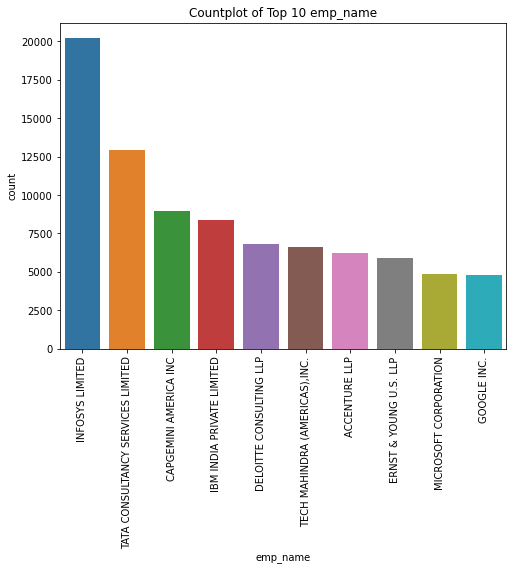

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Get the top 10 categories by count
top_10_categories = df17["emp_name"].value_counts().nlargest(10)

# Filter the data for the top 10 categories
data_top_10 = df17[df17["emp_name"].isin(top_10_categories.index)]

# Plot a countplot of the top 10 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "emp_name", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "emp_name")
plt.xticks(rotation=90)
plt.show()

Based on the above graph we are able to understand that Infosys, TCS and Capgemini are the top employers submitting most number of visa application

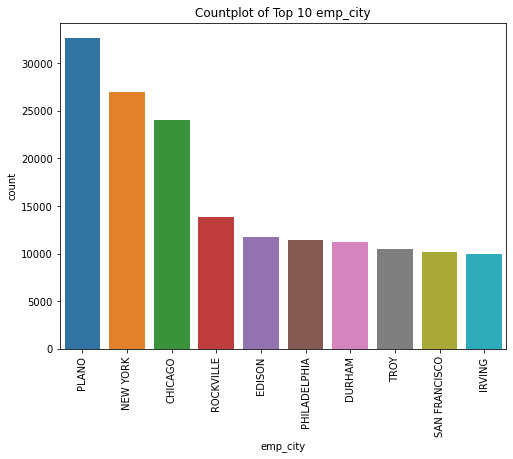

In [47]:
# Get the top 10 categories by count
top_10_categories = df17["emp_city"].value_counts().nlargest(10)

# Filter the data for the top 10 categories
data_top_10 = df17[df17["emp_city"].isin(top_10_categories.index)]

# Plot a countplot of the top 10 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "emp_city", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "emp_city")
plt.xticks(rotation=90)
plt.show()

Most number of application are submitted for employers in Plano followed by New York and Chicago

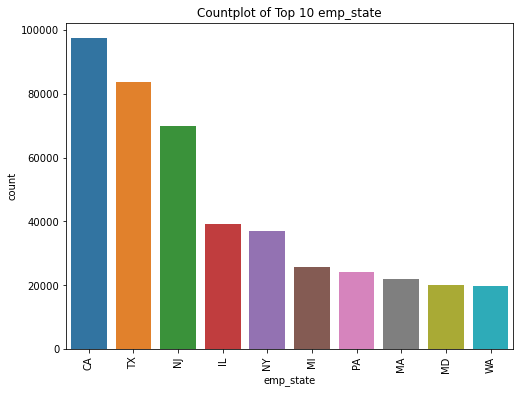

In [48]:
# Get the top 10 categories by count
top_10_categories = df17["emp_state"].value_counts().nlargest(10)

# Filter the data for the top 10 categories
data_top_10 = df17[df17["emp_state"].isin(top_10_categories.index)]

# Plot a countplot of the top 10 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "emp_state", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "emp_state")
plt.xticks(rotation=90)
plt.show()

California, Texas, New Jersey are top states of employers to which most of the applications are being submitted

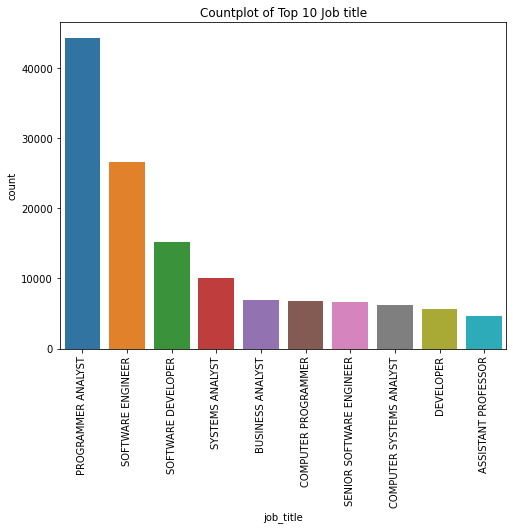

In [49]:
# Get the top 10 categories by count
top_10_categories = df17["job_title"].value_counts().nlargest(10)

# Filter the data for the top 10 categories
data_top_10 = df17[df17["job_title"].isin(top_10_categories.index)]

# Plot a countplot of the top 10 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "job_title", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "Job title")
plt.xticks(rotation=90)
plt.show()

Programmer Analyst is the top role of the applicants followed by Software Engineer and Software Developer

<AxesSubplot:xlabel='full_time_position', ylabel='count'>

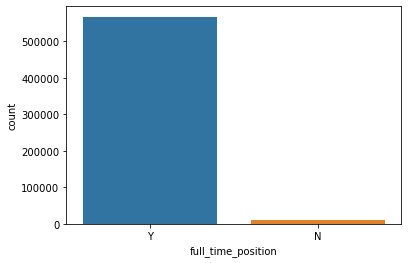

In [50]:
sns.countplot(df17["full_time_position"])

Most of the applications are being submitted for full time employees and the application from the other category is very minimal

<AxesSubplot:xlabel='pw_level', ylabel='count'>

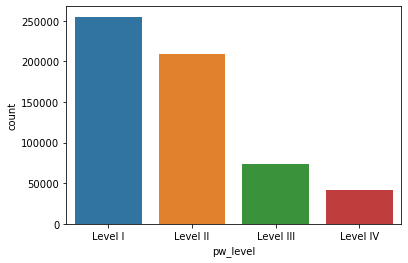

In [51]:
sns.countplot(df17["pw_level"])

Most the applicants fall under prewailing wage level-1 category

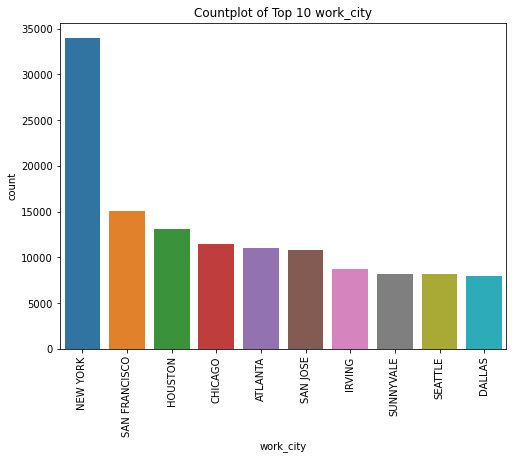

In [52]:
# Get the top 10 categories by count
top_10_categories = df17["work_city"].value_counts().nlargest(10)

# Filter the data for the top 10 categories
data_top_10 = df17[df17["work_city"].isin(top_10_categories.index)]

# Plot a countplot of the top 10 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "work_city", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "work_city")
plt.xticks(rotation=90)
plt.show()

Most of the applicants are applying to work in New York

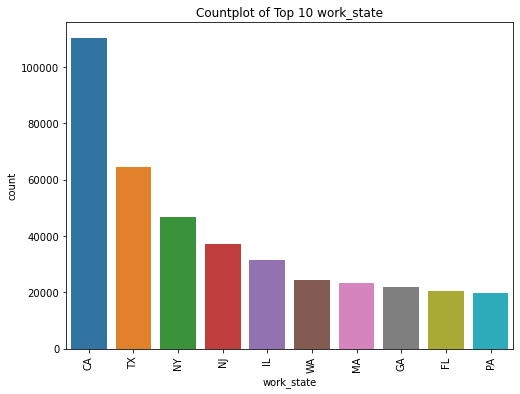

In [53]:
# Get the top 5 categories by count
top_10_categories = df17["work_state"].value_counts().nlargest(10)

# Filter the data for the top 5 categories
data_top_10 = df17[df17["work_state"].isin(top_10_categories.index)]

# Plot a countplot of the top 5 categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data_top_10, x= "work_state", order=top_10_categories.index,)
plt.title('Countplot of Top 10 ' + "work_state")
plt.xticks(rotation=90)
plt.show()

CA is the top state where most applicants prefer to work for

<AxesSubplot:xlabel='emp_h1b_dependent', ylabel='count'>

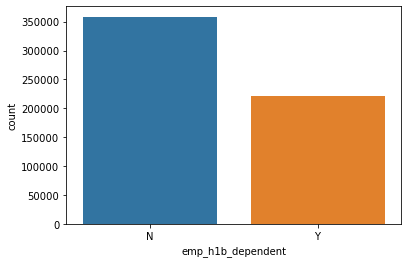

In [54]:
sns.countplot(df17["emp_h1b_dependent"])

Most of the employers are not H1B visa dependents i.e less than 15% of the employees of those employer is H1B visa holders

<AxesSubplot:xlabel='emp_willful_violator', ylabel='count'>

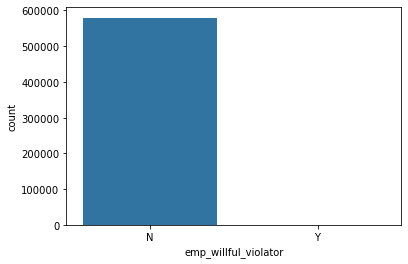

In [55]:
sns.countplot(df17["emp_willful_violator"])

Only few employers are willful violators

### Bivariate Analysis

<AxesSubplot:xlabel='prevailing_wage', ylabel='wage_from'>

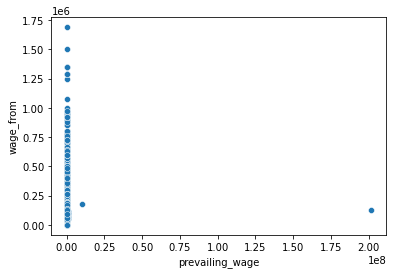

In [56]:
sns.scatterplot(data = df17,x = "prevailing_wage",y = "wage_from")

#### Numerical vs Categorical

<AxesSubplot:xlabel='emp_h1b_dependent', ylabel='prevailing_wage'>

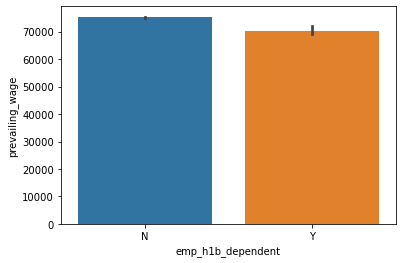

In [57]:
sns.barplot(data = df17,x = "emp_h1b_dependent", y= "prevailing_wage")

There is no big difference in prevailing wage of employers who are dependent on H1-B and the employers who are independent of H1-B

<AxesSubplot:xlabel='pw_level', ylabel='prevailing_wage'>

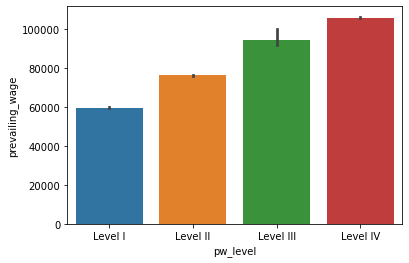

In [58]:
sns.barplot(data = df17,x = "pw_level", y= "prevailing_wage")

PW-Level IV employees earn more than the other category

<AxesSubplot:xlabel='emp_state'>

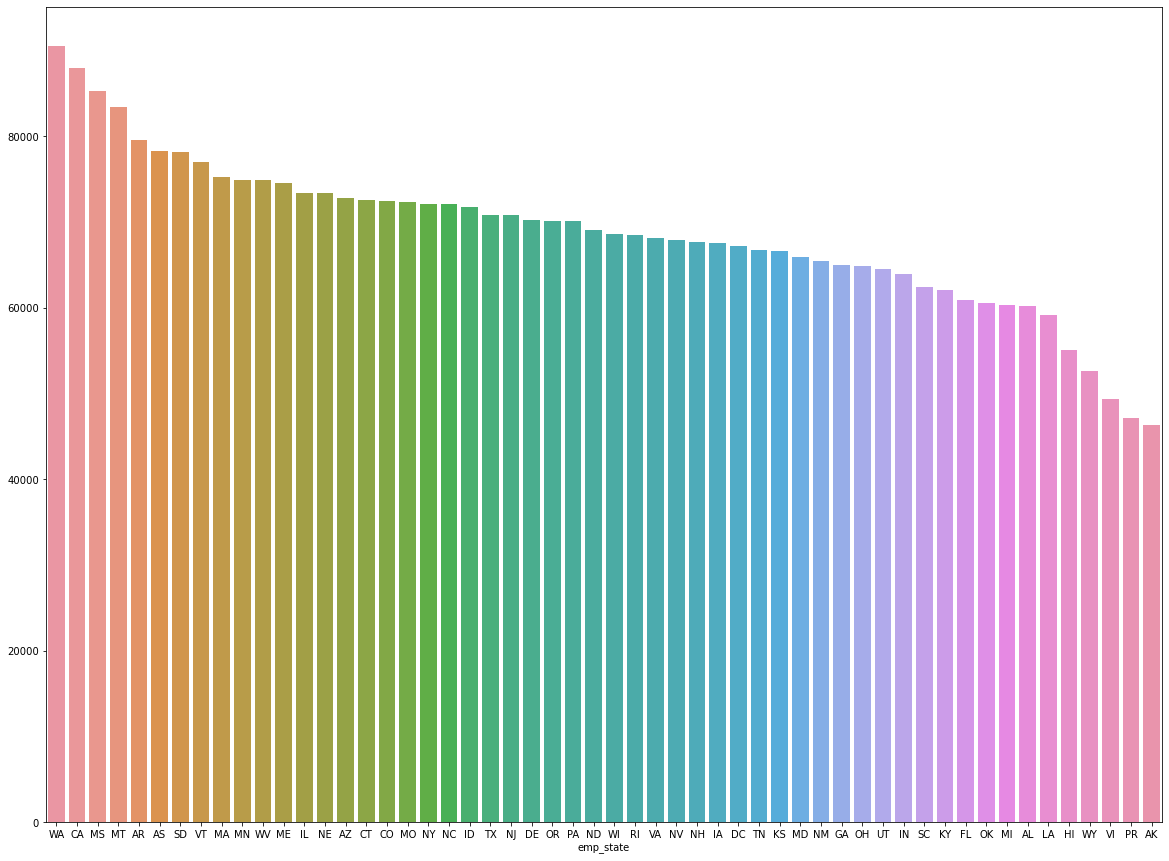

In [59]:
plt.figure(figsize=(20,15))
grouped = df17.groupby('emp_state')['prevailing_wage'].mean().sort_values(ascending=False)
sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)

Washington provides the highest prevailing wage followed by California however there is no big difference in the wage

<AxesSubplot:xlabel='emp_state'>

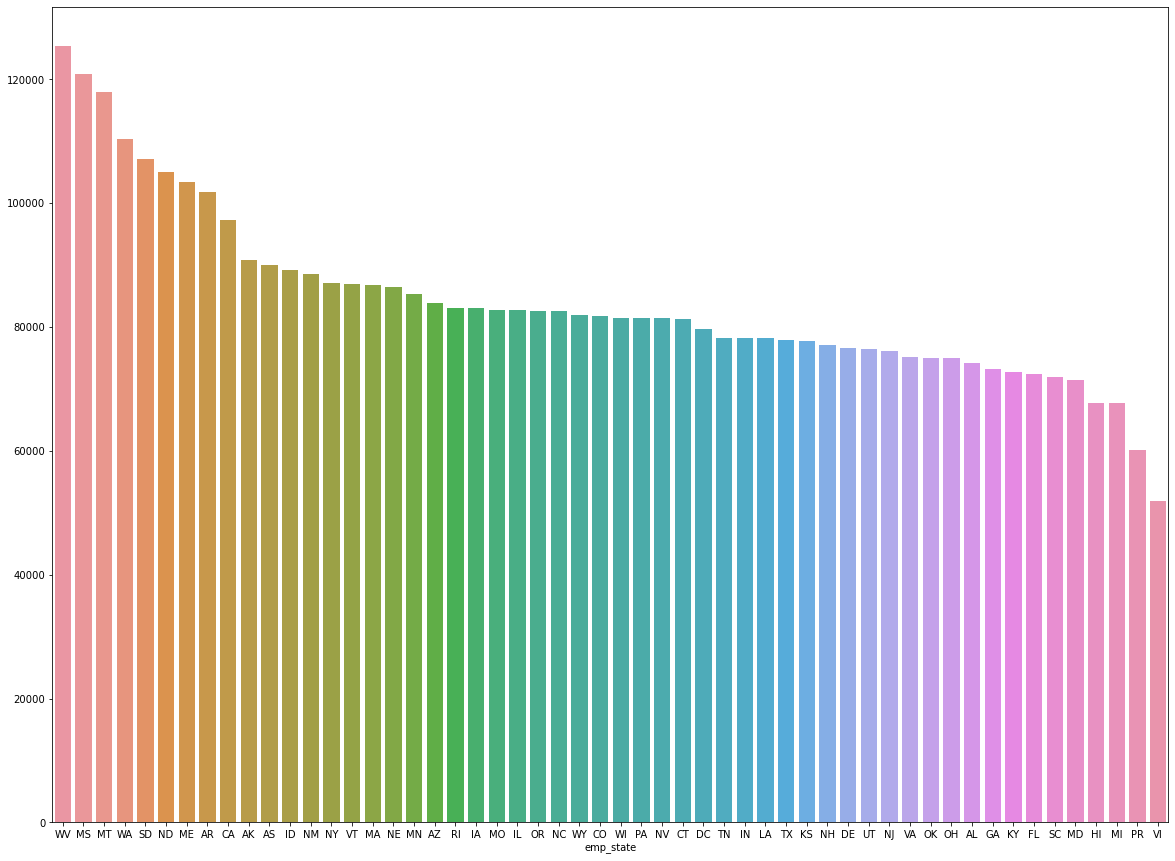

In [60]:
plt.figure(figsize=(20,15))
grouped = df17.groupby('emp_state')['wage_from'].mean().sort_values(ascending=False)
sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)

West virginia employers offers higher wage compared to other states

<AxesSubplot:xlabel='work_state'>

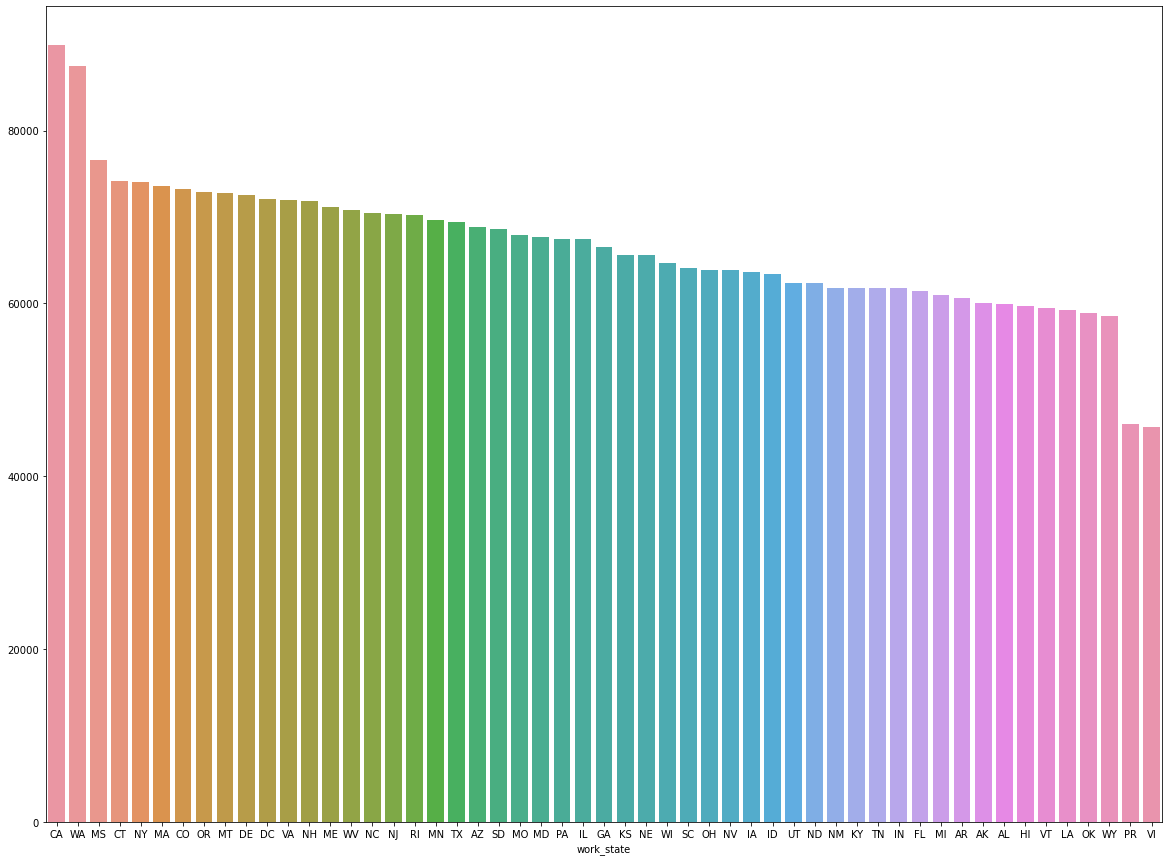

In [61]:
plt.figure(figsize=(20,15))
grouped = df17.groupby('work_state')['prevailing_wage'].mean().sort_values(ascending=False)
sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)

Employees who migrate to California receives a higher wage compared to other states

<AxesSubplot:xlabel='work_state'>

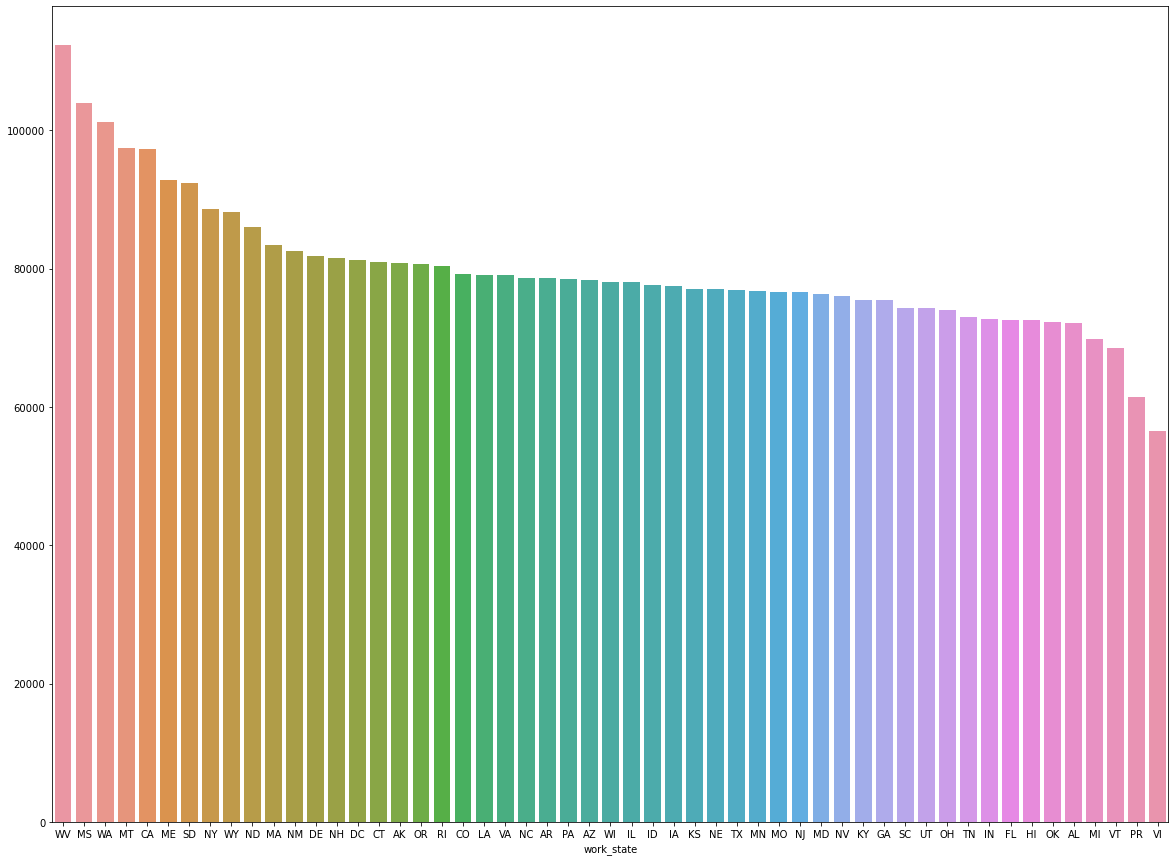

In [62]:
plt.figure(figsize=(20,15))
grouped = df17.groupby('work_state')['wage_from'].mean().sort_values(ascending=False)
sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)

West virginia employers offers higher wage compared to other states

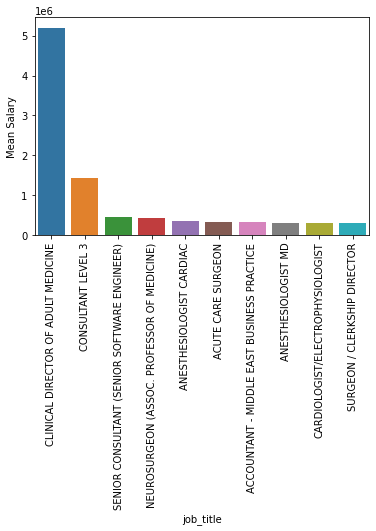

In [63]:
# Group the data by 'job_title' and calculate the mean wage_from for each group
grouped = df17.groupby('job_title')['prevailing_wage'].mean()

# Sort the groups in descending order based on the mean wage_from
grouped_sorted = grouped.sort_values(ascending=False)

# Select the top 10 job titles based on the sorted mean wage_from values
top_10_job_titles = grouped_sorted[:10].index.tolist()

# Filter the original data to keep only the top 10 job titles
df_top_10 = df17[df17['job_title'].isin(top_10_job_titles)]

# Group the filtered data by 'job_title' and calculate the mean wage_from for each group
grouped_top_10 = df_top_10.groupby('job_title')['prevailing_wage'].mean().sort_values(ascending=False)

# Plot the bar chart with the top 10 job titles
sns.barplot(x=grouped_top_10.index, y=grouped_top_10.values, order=grouped_top_10.index)
plt.xticks(rotation=90)
plt.ylabel('Mean Salary')
plt.show()

Clinical Director of Adult Medicine has the highest average salary compared to other designations

#### Categorical vs Categorical

In [64]:
# Get the top 10 job titles based on count
top_10_jobs = df17['job_title'].value_counts().nlargest(10).index

# Filter the DataFrame to keep only the top 10 job titles
df_top_10_jobs = df17[df17['job_title'].isin(top_10_jobs)]

# Compute the frequency table of job_title and emp_h1b_dependent columns
freq_table = pd.crosstab(index=df_top_10_jobs['emp_h1b_dependent'], columns=df_top_10_jobs['job_title'])
freq_table

job_title,ASSISTANT PROFESSOR,BUSINESS ANALYST,COMPUTER PROGRAMMER,COMPUTER SYSTEMS ANALYST,DEVELOPER,PROGRAMMER ANALYST,SENIOR SOFTWARE ENGINEER,SOFTWARE DEVELOPER,SOFTWARE ENGINEER,SYSTEMS ANALYST
emp_h1b_dependent,,,,,,,,,,
N,4655,2967,1715,2115,605,9997,5396,6309,16137,2198
Y,6,3938,5064,4105,4997,34281,1256,8879,10450,7933


Many of the Assistant professors are H1-B visa dependents

In [65]:
# Get the top 10 job titles based on count
top_10_jobs = df17['job_title'].value_counts().nlargest(10).index

# Filter the DataFrame to keep only the top 10 job titles
df_top_10_jobs = df17[df17['job_title'].isin(top_10_jobs)]

# Compute the frequency table of job_title and emp_h1b_dependent columns
freq_table = pd.crosstab(index=df_top_10_jobs['full_time_position'], columns=df_top_10_jobs['job_title'])
freq_table

job_title,ASSISTANT PROFESSOR,BUSINESS ANALYST,COMPUTER PROGRAMMER,COMPUTER SYSTEMS ANALYST,DEVELOPER,PROGRAMMER ANALYST,SENIOR SOFTWARE ENGINEER,SOFTWARE DEVELOPER,SOFTWARE ENGINEER,SYSTEMS ANALYST
full_time_position,,,,,,,,,,
N,155,332,138,54,0,147,5,104,187,63
Y,4506,6573,6641,6166,5602,44131,6647,15084,26400,10068


None of the developers are in part time position and full time employers are more compared to part time employers

### Feature Selection and Engineering

In [66]:
df_num.head()

,prevailing_wage,wage_from,wage_to,lat,lng
0,187200.0,190000.00,0.0,34.178172,-82.379015
1,39957.0,47507.00,0.0,42.944078,-112.838326
2,59966.0,65000.00,0.0,39.509556,-76.164120
3,78832.0,86988.15,0.0,39.509556,-76.164120
4,169645.0,450000.00,0.0,45.464698,-98.486483


In [67]:
df_num.drop(['lat', 'lng'], axis = 1, inplace = True)

Since we don't really need latitude and longitude, we can drop those columns.

In [68]:
df_num['wage_range'] = np.abs(df_num['wage_to'] - df_num['wage_from'])
df_num.drop(['wage_from', 'wage_to'], axis = 1, inplace = True)
df_num.head()

,prevailing_wage,wage_range
0,187200.0,190000.00
1,39957.0,47507.00
2,59966.0,65000.00
3,78832.0,86988.15
4,169645.0,450000.00


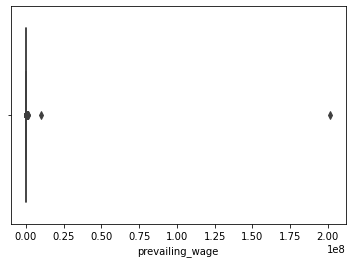

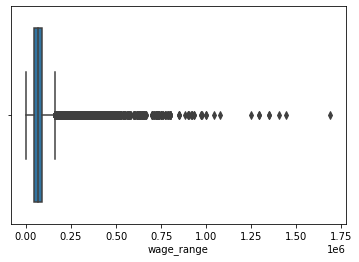

In [69]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

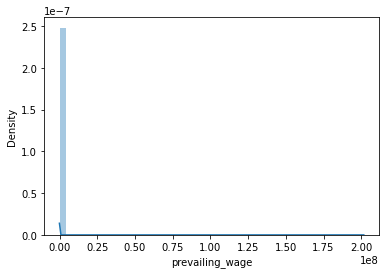

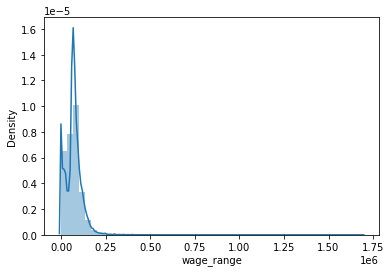

In [70]:
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.show()

### Scaling numerical columns

In [71]:
ssc = StandardScaler()
df_num = pd.DataFrame(ssc.fit_transform(df_num), columns = df_num.columns)

In [72]:
round(df_num.describe(),2)

,prevailing_wage,wage_range
count,579397.00,579397.00
mean,0.00,-0.00
std,1.00,1.00
min,-0.27,-1.51
25%,-0.06,-0.56
50%,-0.01,-0.02
75%,0.06,0.44
max,754.75,35.08


### Merging case_submitted and decision_date into decision_time

In [73]:
df_cat['case_submitted'] = pd.to_datetime(df_cat['case_submitted'])
df_cat['decision_date'] = pd.to_datetime(df_cat['decision_date'])
df_cat['decision_time'] = df_cat['decision_date'] - df_cat['case_submitted']

In [74]:
df_cat.head()

,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,soc_code,soc_name,full_time_position,pw_unit,pw_level,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,decision_time
0,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,USA,NEPHROLOGIST,29-1063,"INTERNISTS, GENERAL",Y,Y,Level I,Y,ABBEVILLE,SC,N,N,4 days
1,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,USA,POST DOCTORAL FELLOW,19-1013,SOIL AND PLANT SCIENTISTS,Y,Y,Level I,Y,ABERDEEN,ID,N,N,6 days
2,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,USA,OPERATION ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,Y,Y,Level I,Y,ABERDEEN,MD,N,N,6 days
3,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,USA,SR. INDUSTRIAL ENGINEER,17-2112,INDUSTRIAL ENGINEERS,Y,Y,Level II,Y,ABERDEEN,MD,N,N,6 days
4,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,USA,HEMATOLOGIST/ONCOLOGIST,29-1069,"PHYSICIANS AND SURGEONS, ALL OTHER",Y,Y,Level I,Y,ABERDEEN,SD,N,N,6 days


In [75]:
df_cat.drop(['case_submitted', 'decision_date'], axis = 1, inplace = True)

In [76]:
df_cat['decision_time'].value_counts()

6 days       345900
4 days        91101
7 days        59911
5 days        15066
0 days         7290
              ...  
1260 days         1
1118 days         1
1173 days         1
1295 days         1
1249 days         1
Name: decision_time, Length: 1311, dtype: int64

In [77]:
df_cat.head()

,case_status,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,soc_code,soc_name,full_time_position,pw_unit,pw_level,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,decision_time
0,C,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,USA,NEPHROLOGIST,29-1063,"INTERNISTS, GENERAL",Y,Y,Level I,Y,ABBEVILLE,SC,N,N,4 days
1,C,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,USA,POST DOCTORAL FELLOW,19-1013,SOIL AND PLANT SCIENTISTS,Y,Y,Level I,Y,ABERDEEN,ID,N,N,6 days
2,C,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,USA,OPERATION ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,Y,Y,Level I,Y,ABERDEEN,MD,N,N,6 days
3,C,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,USA,SR. INDUSTRIAL ENGINEER,17-2112,INDUSTRIAL ENGINEERS,Y,Y,Level II,Y,ABERDEEN,MD,N,N,6 days
4,C,SANFORD CLINIC,SIOUX FALLS,SD,57117,USA,HEMATOLOGIST/ONCOLOGIST,29-1069,"PHYSICIANS AND SURGEONS, ALL OTHER",Y,Y,Level I,Y,ABERDEEN,SD,N,N,6 days


### Encoding

In [78]:
df_cat['case_status'].unique()

array(['C', 'CW', 'D', 'W'], dtype=object)

Since CW and W convey the same information to the model, we will use W to represent both.

In [79]:
df_cat['case_status'].replace('CW', 'W', inplace = True)

In [80]:
le = LabelEncoder()
df_cat['case_status'] = pd.DataFrame(le.fit_transform(np.array(df_cat['case_status']).reshape(-1,1)))

In [81]:
df_cat['case_status'].unique()

array([0, 2, 1])

In [82]:
df_cat['pw_level'] = pd.DataFrame(le.fit_transform(np.array(df_cat['pw_level']).reshape(-1,1)))
df_cat['pw_level'].unique()

array([0, 1, 2, 3])

In [83]:
df_cat['wage_unit'].unique()

array(['Y', 'H', 'M', 'W', 'BW'], dtype=object)

In [84]:
df_cat['wage_unit'] = pd.DataFrame(le.fit_transform(np.array(df_cat['wage_unit']).reshape(-1,1)))
df_cat['wage_unit'].unique()

array([4, 1, 2, 3, 0])

Since pw_unit and wage_unit convey the same information to the model, we can remove pw_unit.

In [85]:
df_cat.drop('pw_unit', axis = 1, inplace = True)

We can drop emp_name, emp_city, emp_state, emp_zip since none of these columns determine if the application will be certified.

In [86]:
df_cat.drop(['emp_name', 'emp_city', 'emp_state', 'emp_zip'], axis = 1, inplace = True)

In [87]:
df_cat.head()

,case_status,emp_country,job_title,soc_code,soc_name,full_time_position,pw_level,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,decision_time
0,0,USA,NEPHROLOGIST,29-1063,"INTERNISTS, GENERAL",Y,0,4,ABBEVILLE,SC,N,N,4 days
1,0,USA,POST DOCTORAL FELLOW,19-1013,SOIL AND PLANT SCIENTISTS,Y,0,4,ABERDEEN,ID,N,N,6 days
2,0,USA,OPERATION ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,Y,0,4,ABERDEEN,MD,N,N,6 days
3,0,USA,SR. INDUSTRIAL ENGINEER,17-2112,INDUSTRIAL ENGINEERS,Y,1,4,ABERDEEN,MD,N,N,6 days
4,0,USA,HEMATOLOGIST/ONCOLOGIST,29-1069,"PHYSICIANS AND SURGEONS, ALL OTHER",Y,0,4,ABERDEEN,SD,N,N,6 days


We can also drop work_city and work_state since they don't determine certification.

In [88]:
df_cat.drop(['work_city', 'work_state'], axis = 1, inplace = True)

In [89]:
df_cat['emp_country'].value_counts()

USA          579386
CANADA            7
AUSTRALIA         2
CAMBODIA          1
CHINA             1
Name: emp_country, dtype: int64

Since most of the entires have emp_country as USA, we can create a new dataframe consisting of records where employers are from the USA only.

In [90]:
df_cat = df_cat[df_cat['emp_country'] == 'USA']

In [91]:
df_cat.drop('emp_country', axis = 1, inplace = True)

In [92]:
df_cat.head()

,case_status,job_title,soc_code,soc_name,full_time_position,pw_level,wage_unit,emp_h1b_dependent,emp_willful_violator,decision_time
0,0,NEPHROLOGIST,29-1063,"INTERNISTS, GENERAL",Y,0,4,N,N,4 days
1,0,POST DOCTORAL FELLOW,19-1013,SOIL AND PLANT SCIENTISTS,Y,0,4,N,N,6 days
2,0,OPERATION ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,Y,0,4,N,N,6 days
3,0,SR. INDUSTRIAL ENGINEER,17-2112,INDUSTRIAL ENGINEERS,Y,1,4,N,N,6 days
4,0,HEMATOLOGIST/ONCOLOGIST,29-1069,"PHYSICIANS AND SURGEONS, ALL OTHER",Y,0,4,N,N,6 days


In [93]:
df_cat['job_title'].value_counts()

PROGRAMMER ANALYST                                   44278
SOFTWARE ENGINEER                                    26587
SOFTWARE DEVELOPER                                   15187
SYSTEMS ANALYST                                      10131
BUSINESS ANALYST                                      6905
                                                     ...  
TEST DATA ARCHITECT                                      1
ATG SOFTWARE DEVELOPER                                   1
SENIOR WEBSPHERE ENGINEER                                1
UNIFIED COMMUNICATIONS TECHNICAL SUPPORT ENGINEER        1
LEAD DEVELOPER, STERLING OMS                             1
Name: job_title, Length: 85627, dtype: int64

There are 85627 unique values for job_title. Since encoding this would be extremely time consuming and illogical, we can drop this column.

In [94]:
df_cat.drop('job_title', axis = 1, inplace = True)

We can also drop the soc_name since soc_name and soc_code convey the same information to the model.

In [95]:
df_cat.drop('soc_name', axis = 1, inplace = True)

In [96]:
df_cat.head()

,case_status,soc_code,full_time_position,pw_level,wage_unit,emp_h1b_dependent,emp_willful_violator,decision_time
0,0,29-1063,Y,0,4,N,N,4 days
1,0,19-1013,Y,0,4,N,N,6 days
2,0,15-2031,Y,0,4,N,N,6 days
3,0,17-2112,Y,1,4,N,N,6 days
4,0,29-1069,Y,0,4,N,N,6 days


We can encode full_time_position, emp_h1b_dependent and emp_willful_violator using dummies encoding.

In [97]:
df_cat['full_time_position'] = pd.get_dummies(df_cat['full_time_position'], drop_first = True)

In [98]:
df_cat['full_time_position'].unique()

array([1, 0], dtype=uint8)

In [99]:
df_cat['emp_h1b_dependent'] = pd.get_dummies(df_cat['emp_h1b_dependent'], drop_first = True)

In [100]:
df_cat['emp_willful_violator'] = pd.get_dummies(df_cat['emp_willful_violator'], drop_first = True)

In [101]:
df_cat.head()

,case_status,soc_code,full_time_position,pw_level,wage_unit,emp_h1b_dependent,emp_willful_violator,decision_time
0,0,29-1063,1,0,4,0,0,4 days
1,0,19-1013,1,0,4,0,0,6 days
2,0,15-2031,1,0,4,0,0,6 days
3,0,17-2112,1,1,4,0,0,6 days
4,0,29-1069,1,0,4,0,0,6 days


In [102]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579386 entries, 0 to 579396
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   case_status           579386 non-null  int32          
 1   soc_code              579386 non-null  object         
 2   full_time_position    579386 non-null  uint8          
 3   pw_level              579386 non-null  int32          
 4   wage_unit             579386 non-null  int32          
 5   emp_h1b_dependent     579386 non-null  uint8          
 6   emp_willful_violator  579386 non-null  uint8          
 7   decision_time         579386 non-null  timedelta64[ns]
dtypes: int32(3), object(1), timedelta64[ns](1), uint8(3)
memory usage: 21.5+ MB


In [103]:
df_cat['soc_code'] = df_cat['soc_code'].apply(lambda x : x.split('-')).str.join('')

In [104]:
df_cat['soc_code'].replace(['SOFTWARE DEVELOPERS, APPLICATIONS', 
                            'COMPUTER OCCUPATIONS, ALL OTHER', 
                            'ELECTRICAL ENGINEERS', 
                            'ENGINEERS, ALL OTHER', 
                            'MECHANICAL ENGINEERS'], np.nan, inplace = True)

In [105]:
df_cat['soc_code'].astype('object')

0         291063
1         191013
2         152031
3         172112
4         291069
           ...  
579392    151132
579393    419031
579394    151199
579395    151132
579396    151141
Name: soc_code, Length: 579386, dtype: object

In [106]:
df_cat.head()

,case_status,soc_code,full_time_position,pw_level,wage_unit,emp_h1b_dependent,emp_willful_violator,decision_time
0,0,291063,1,0,4,0,0,4 days
1,0,191013,1,0,4,0,0,6 days
2,0,152031,1,0,4,0,0,6 days
3,0,172112,1,1,4,0,0,6 days
4,0,291069,1,0,4,0,0,6 days


In [107]:
df_cat['decision_time'] = df_cat['decision_time'].dt.days

In [108]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579386 entries, 0 to 579396
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   case_status           579386 non-null  int32 
 1   soc_code              579379 non-null  object
 2   full_time_position    579386 non-null  uint8 
 3   pw_level              579386 non-null  int32 
 4   wage_unit             579386 non-null  int32 
 5   emp_h1b_dependent     579386 non-null  uint8 
 6   emp_willful_violator  579386 non-null  uint8 
 7   decision_time         579386 non-null  int64 
dtypes: int32(3), int64(1), object(1), uint8(3)
memory usage: 21.5+ MB


In [109]:
dfs = pd.concat([df_num, df_cat], axis = 1, join = 'inner')

In [110]:
dfs.head()

,prevailing_wage,wage_range,case_status,soc_code,full_time_position,pw_level,wage_unit,emp_h1b_dependent,emp_willful_violator,decision_time
0,0.426325,2.610290,0,291063,1,0,4,0,0,4
1,-0.125063,-0.478678,0,191013,1,0,4,0,0,6
2,-0.050134,-0.099464,0,152031,1,0,4,0,0,6
3,0.020514,0.377195,0,172112,1,1,4,0,0,6
4,0.360586,8.246578,0,291069,1,0,4,0,0,6


In [111]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579386 entries, 0 to 579396
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   prevailing_wage       579386 non-null  float64
 1   wage_range            579386 non-null  float64
 2   case_status           579386 non-null  int32  
 3   soc_code              579379 non-null  object 
 4   full_time_position    579386 non-null  uint8  
 5   pw_level              579386 non-null  int32  
 6   wage_unit             579386 non-null  int32  
 7   emp_h1b_dependent     579386 non-null  uint8  
 8   emp_willful_violator  579386 non-null  uint8  
 9   decision_time         579386 non-null  int64  
dtypes: float64(2), int32(3), int64(1), object(1), uint8(3)
memory usage: 30.4+ MB


Although soc_code is an important variable, it is causing issues. So we can drop it for the time being.

In [112]:
dfs.drop('soc_code', axis = 1, inplace = True)

In [113]:
dfs.head()

,prevailing_wage,wage_range,case_status,full_time_position,pw_level,wage_unit,emp_h1b_dependent,emp_willful_violator,decision_time
0,0.426325,2.610290,0,1,0,4,0,0,4
1,-0.125063,-0.478678,0,1,0,4,0,0,6
2,-0.050134,-0.099464,0,1,0,4,0,0,6
3,0.020514,0.377195,0,1,1,4,0,0,6
4,0.360586,8.246578,0,1,0,4,0,0,6


### train_test_split and Building the base model

In [114]:
dfs.isnull().sum()

prevailing_wage         0
wage_range              0
case_status             0
full_time_position      0
pw_level                0
wage_unit               0
emp_h1b_dependent       0
emp_willful_violator    0
decision_time           0
dtype: int64

In [115]:
x = dfs.drop('case_status', axis = 1)
y = dfs['case_status']

In [116]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, random_state = 100)

In [117]:
log_reg_bs = LogisticRegression().fit(xtrain, ytrain)
ypred_test_lr_bs = log_reg_bs.predict(xtest)

In [118]:
print(classification_report(ytest, ypred_test_lr_bs))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    101548
           1       1.00      0.00      0.00      1354
           2       1.00      0.67      0.80     12976

    accuracy                           0.95    115878
   macro avg       0.98      0.56      0.59    115878
weighted avg       0.95      0.95      0.94    115878



### Performing SMOTE and comparing models

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
sm = SMOTE(random_state=100)

In [121]:
x_res,y_res = sm.fit_resample(x,y)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
xtrain, xtest, ytrain, ytest = train_test_split(x_res, y_res, train_size = 0.8, random_state = 100)

In [124]:
log_reg = LogisticRegression().fit(xtrain, ytrain)
ypred_test_lr = log_reg.predict(xtest)

In [125]:
print(classification_report(ytest, ypred_test_lr))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71    101397
           1       0.62      0.68      0.65    101447
           2       1.00      0.69      0.82    101231

    accuracy                           0.72    304075
   macro avg       0.76      0.72      0.73    304075
weighted avg       0.76      0.72      0.73    304075



After SMOTE imbalance in the datset has reduced significantly. F1 score for class 1(Rejected) has also improved significantly. This is expected as our dataset now has a lot more data points belonging to class 1 making it easier for the model to learn the attributes  that helps the model classify when a data point belongs to class 1.

In [126]:
log_reg = LogisticRegression().fit(xtrain, ytrain)
ypred_train_lr = log_reg.predict(xtrain)

In [127]:
print(classification_report(ytrain, ypred_train_lr))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71    405394
           1       0.62      0.68      0.65    405344
           2       1.00      0.69      0.82    405560

    accuracy                           0.72   1216298
   macro avg       0.76      0.72      0.73   1216298
weighted avg       0.76      0.72      0.73   1216298



Since we are trying to reduce the wait time of VISA application process by predicting the outcome, we will look at the precision score. This is because Precision considers False Postives and in our case applications that are falsely classified as rejected greatly increase the waiting time.

Comparing the model's Precision score over the train and test data we can see that the scores are the same. From this we can say that the model is not overfitting.

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)
ypred_ada_test =  model_ada.predict(xtest)

In [130]:
print(classification_report(ytest, ypred_ada_test))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82    101397
           1       0.70      0.73      0.72    101447
           2       0.99      0.75      0.85    101231

    accuracy                           0.79    304075
   macro avg       0.81      0.79      0.80    304075
weighted avg       0.81      0.79      0.80    304075



The Adaboost model performs slightly better than the logistic regression model as seen above

In [131]:
ada = AdaBoostClassifier()
model_ada = ada.fit(xtrain,ytrain)
ypred_ada_train =  model_ada.predict(xtrain)

In [132]:
print(classification_report(ytrain, ypred_ada_train))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82    405394
           1       0.70      0.73      0.72    405344
           2       0.99      0.75      0.86    405560

    accuracy                           0.79   1216298
   macro avg       0.81      0.79      0.80   1216298
weighted avg       0.81      0.79      0.80   1216298



In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(xtrain,ytrain)
ypred_gb_test = gb_model.predict(xtest)

In [135]:
print(classification_report(ytest, ypred_gb_test))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82    101397
           1       0.78      0.76      0.77    101447
           2       0.99      0.86      0.92    101231

    accuracy                           0.84    304075
   macro avg       0.84      0.84      0.84    304075
weighted avg       0.84      0.84      0.84    304075



With gradient boosting classifier model the Precision score of class 1 and 2 has increased.

In [136]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(xtrain,ytrain)
ypred_gb_train = gb_model.predict(xtrain)

In [137]:
print(classification_report(ytrain, ypred_gb_train))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82    405394
           1       0.78      0.76      0.77    405344
           2       0.99      0.86      0.92    405560

    accuracy                           0.84   1216298
   macro avg       0.84      0.84      0.84   1216298
weighted avg       0.84      0.84      0.84   1216298



In [138]:
from xgboost import XGBClassifier

In [139]:
xg = XGBClassifier()
xg_model = xg.fit(xtrain,ytrain)
ypred_xg_test = xg_model.predict(xtest) 

In [140]:
print(classification_report(ytest, ypred_xg_test))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86    101397
           1       0.83      0.80      0.81    101447
           2       0.99      0.88      0.93    101231

    accuracy                           0.87    304075
   macro avg       0.87      0.87      0.87    304075
weighted avg       0.87      0.87      0.87    304075



With Xgboost classifier the recall score has increased for all the classes

In [141]:
xg = XGBClassifier()
xg_model = xg.fit(xtrain,ytrain)
ypred_xg_train = xg_model.predict(xtrain) 

In [142]:
print(classification_report(ytrain, ypred_xg_train))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86    405394
           1       0.83      0.80      0.82    405344
           2       0.99      0.88      0.93    405560

    accuracy                           0.87   1216298
   macro avg       0.87      0.87      0.87   1216298
weighted avg       0.87      0.87      0.87   1216298



In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(xtrain,ytrain)
ypred_dt_test = model_dt.predict(xtest)

In [145]:
print(classification_report(ytest, ypred_dt_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    101397
           1       0.91      0.90      0.90    101447
           2       0.95      0.95      0.95    101231

    accuracy                           0.92    304075
   macro avg       0.92      0.92      0.92    304075
weighted avg       0.92      0.92      0.92    304075



Precision score has greatly increased for class 1 when using Decision tree classifier

In [146]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(xtrain,ytrain)
ypred_dt_train = model_dt.predict(xtrain)

In [147]:
print(classification_report(ytrain, ypred_dt_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    405394
           1       1.00      1.00      1.00    405344
           2       1.00      1.00      1.00    405560

    accuracy                           1.00   1216298
   macro avg       1.00      1.00      1.00   1216298
weighted avg       1.00      1.00      1.00   1216298



In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)
ypred_rf_test = model_rf.predict(xtest)

In [150]:
print(classification_report(ytest, ypred_rf_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92    101397
           1       0.92      0.93      0.92    101447
           2       0.98      0.94      0.96    101231

    accuracy                           0.93    304075
   macro avg       0.94      0.93      0.94    304075
weighted avg       0.94      0.93      0.94    304075



There was a slight improvement in the scores and this is the best performing model compared to the others.

In [151]:
rf = RandomForestClassifier()
model_rf = rf.fit(xtrain,ytrain)
ypred_rf_train = model_rf.predict(xtrain)

In [152]:
print(classification_report(ytrain, ypred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    405394
           1       1.00      1.00      1.00    405344
           2       1.00      1.00      1.00    405560

    accuracy                           1.00   1216298
   macro avg       1.00      1.00      1.00   1216298
weighted avg       1.00      1.00      1.00   1216298



### Hyperparameter tuning

In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
from scipy.stats import randint
params = {"n_estimators": randint(100, 300),
          "max_depth": randint(5,15),
          "min_samples_split": randint(2,10),
          "min_samples_leaf": randint(1,5),
          "max_features": ["sqrt","log2"]}

In [155]:
rs = RandomizedSearchCV(estimator=rf,param_distributions=params,n_jobs=-1,cv=5)

In [156]:
rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC485EFA00>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC485EF550>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC485F41F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CC485F4C40>})

In [157]:
rs.best_params_

{'max_depth': 14,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 128}

In [158]:
rf = RandomForestClassifier(max_depth= 14,max_features= 'log2',min_samples_leaf= 3,min_samples_split= 3,n_estimators= 135)
model_rf_final = rf.fit(xtrain,ytrain)
ypred_rf_final = model_rf_final.predict(xtest)

In [159]:
print(classification_report(ytest, ypred_rf_final))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84    101397
           1       0.81      0.81      0.81    101447
           2       1.00      0.87      0.93    101231

    accuracy                           0.86    304075
   macro avg       0.87      0.86      0.86    304075
weighted avg       0.87      0.86      0.86    304075



In [169]:
ypred_rf_final_train = model_rf_final.predict(xtrain)

In [170]:
print(classification_report(ytrain, ypred_rf_final_train))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85    405394
           1       0.81      0.81      0.81    405344
           2       1.00      0.88      0.93    405560

    accuracy                           0.86   1216298
   macro avg       0.87      0.86      0.86   1216298
weighted avg       0.87      0.86      0.86   1216298



In [160]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [161]:
from yellowbrick.classifier import ROCAUC

In [162]:
def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'Approved', 
                                        1: 'Rejected', 
                                        2: 'Withdrawn'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

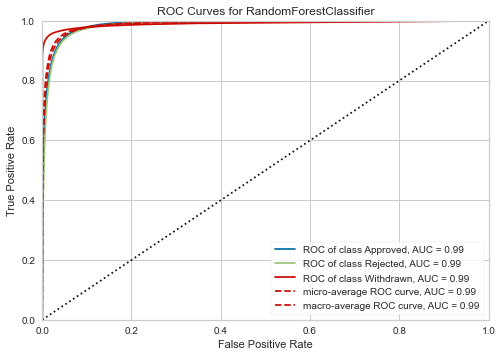

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Approved', 1: 'Rejected', 2: 'Withdrawn'},
       estimator=RandomForestClassifier())

In [163]:
#Random forest
plot_ROC_curve(model_rf,xtrain,ytrain,xtest,ytest)

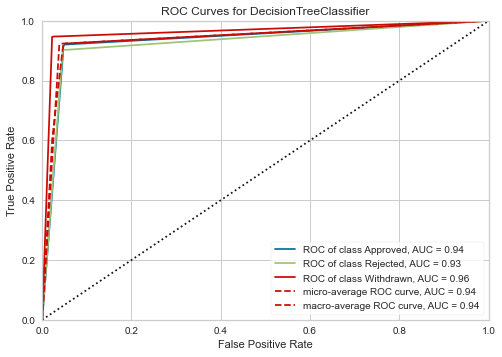

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Approved', 1: 'Rejected', 2: 'Withdrawn'},
       estimator=DecisionTreeClassifier())

In [164]:
#decision tree
plot_ROC_curve(model_dt,xtrain,ytrain,xtest,ytest)

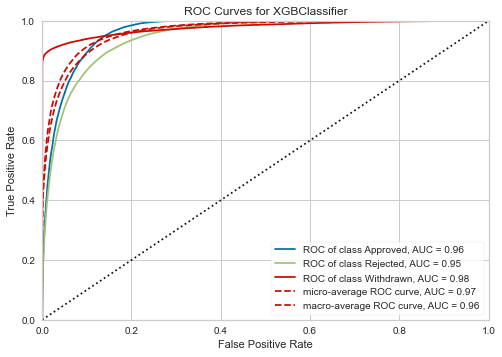

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Approved', 1: 'Rejected', 2: 'Withdrawn'},
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categoric...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [165]:
#decision tree
plot_ROC_curve(xg_model,xtrain,ytrain,xtest,ytest)

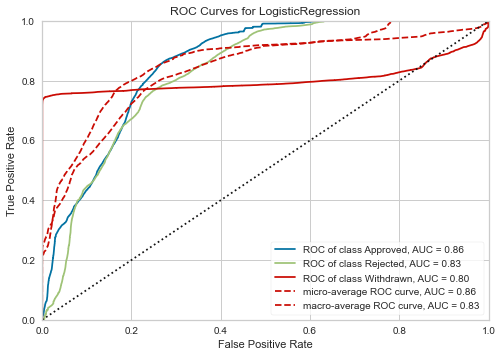

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Approved', 1: 'Rejected', 2: 'Withdrawn'},
       estimator=LogisticRegression())

In [166]:
#logistic Regression
plot_ROC_curve(log_reg,xtrain,ytrain,xtest,ytest)

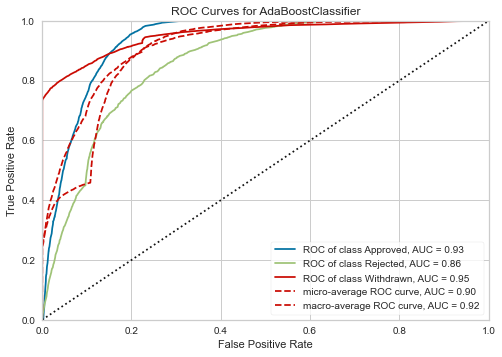

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Approved', 1: 'Rejected', 2: 'Withdrawn'},
       estimator=AdaBoostClassifier())

In [167]:
#Adaboost Classifier
plot_ROC_curve(model_ada,xtrain,ytrain,xtest,ytest)

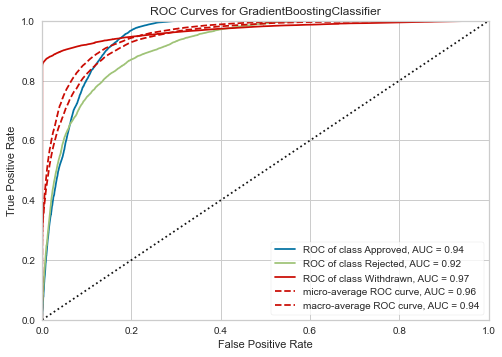

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'Approved', 1: 'Rejected', 2: 'Withdrawn'},
       estimator=GradientBoostingClassifier())

In [168]:
#Gradient Boosting
plot_ROC_curve(gb_model,xtrain,ytrain,xtest,ytest)